### Playing with Multiple Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
data = pd.read_csv('../data/advertising.csv')
df = pd.DataFrame(data)

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
X = df.drop(columns='Sales', axis=1)
y = df[['Sales']]

### Model

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

lr.fit(X, y)

LinearRegression()

### Trying to acquire the equation

In [11]:
lr.intercept_[0]

4.625124078808653

In [25]:
lr.coef_[0]

array([0.05444578, 0.10700123, 0.00033566])

### So, it's something like:
* 4.63 + 0.05\*x_1 + 0.11\*x_2 + 0.00\*x_3 (due to precision loss)

### Trying to visualize

In [15]:
len(y)

200

In [48]:
def f(x_1, x_2, x_3):
    return lr.intercept_[0] + x_1*lr.coef_[0][0] + x_2*lr.coef_[0][1] + x_3*lr.coef_[0][2]

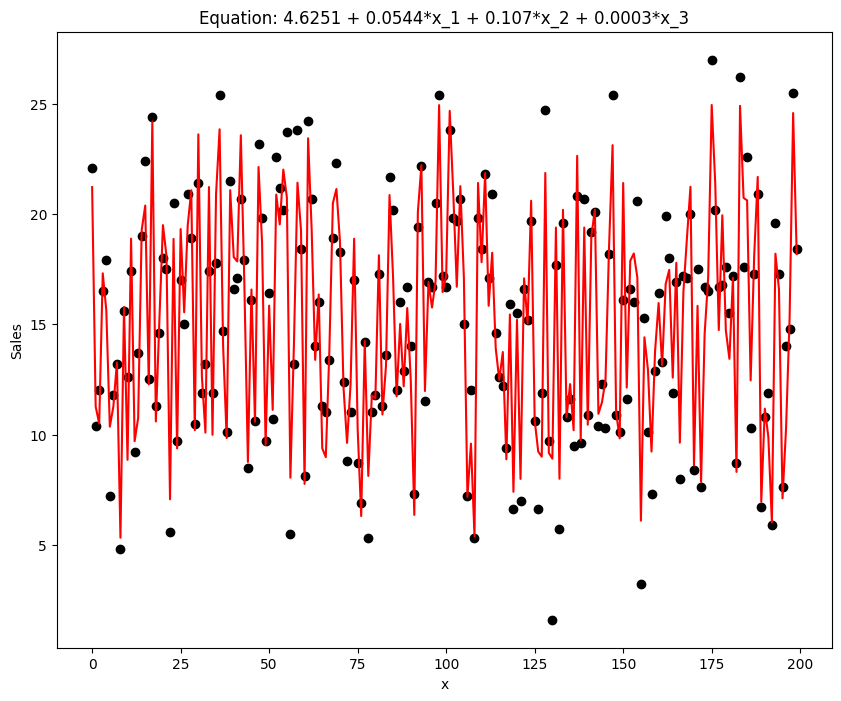

In [60]:
plt.figure(figsize=(10, 8))

l = []

for i in range(len(df)):
    l.append(f(X.iloc[i][0], X.iloc[i][1], X.iloc[i][2]))

plt.scatter(y=y, x=np.arange(0, 200, 1), c='black')
plt.plot(l, c='red')
plt.title(f'Equation: {round(lr.intercept_[0], 4)} + {round(lr.coef_[0][0], 4)}*x_1 + {round(lr.coef_[0][1], 4)}*x_2 + {round(lr.coef_[0][2], 4)}*x_3')
plt.ylabel('Sales')
plt.xlabel('x')
plt.show()